<a href="https://colab.research.google.com/github/404S-retr0/RINEX_Project_Submission/blob/main/project/MajorProject2_AnuragDe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cat or Dog detection using CNN binary classification

#Data Wrangling

In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
!wget --no-check-certificate \https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \-O /tmp/cats_and_dogs_filtered.zip

--2022-01-13 17:09:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   301MB/s    in 0.2s    

2022-01-13 17:09:37 (301 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile
my_zip = '/tmp/cats_and_dogs_filtered.zip'
new = zipfile.ZipFile(my_zip, 'r')
new.extractall('/tmp')
new.close()

#Importing the dataset as per training and validation data required

In [4]:
base_directory = '/tmp/cats_and_dogs_filtered'
train_directory = os.path.join(base_directory, 'train')
validation_directory = os.path.join(base_directory, 'validation')

In [5]:
train_cats_directory = os.path.join(train_directory, 'cats')
train_dogs_directory = os.path.join(train_directory, 'dogs')
validation_cats_directory = os.path.join(validation_directory, 'cats')
validation_dogs_directory = os.path.join(validation_directory, 'dogs')

In [6]:
train_cat_names = os.listdir(train_cats_directory)
train_dog_names = os.listdir(train_dogs_directory)

In [7]:
print(f'n° of training cat images : {len(os.listdir(train_cats_directory))}')
print(f'n° of training dog images : {len(os.listdir(train_dogs_directory))}')
print(f'n° of validation cat images : {len(os.listdir(validation_cats_directory))}')
print(f'n° of validation dog images : {len(os.listdir(validation_dogs_directory))}')

n° of training cat images : 1000
n° of training dog images : 1000
n° of validation cat images : 500
n° of validation dog images : 500


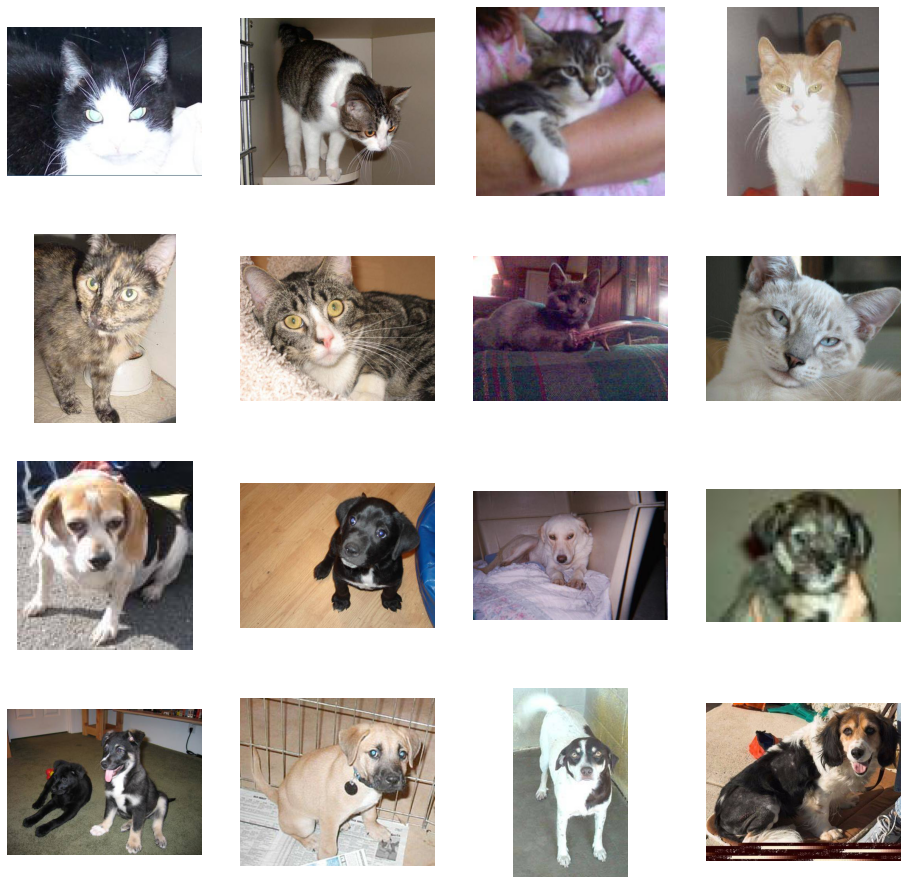

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
n_rows = 4
n_cols = 4
index = 0
fig = plt.gcf()
fig.set_size_inches(n_cols*4, n_rows*4)
index+=8
next_cat_pix = [os.path.join(train_cats_directory, fname) 
                for fname in train_cat_names[index-8:index] 
               ]

next_dog_pix = [os.path.join(train_dogs_directory, fname) 
                for fname in train_dog_names[index-8:index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(n_rows, n_cols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#Defining the model definition

In [9]:
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [10]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics = ['accuracy'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_directory,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))

validation_generator =  test_datagen.flow_from_directory( validation_directory,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#Fitting the model with data

In [12]:
history=model.fit(train_generator,validation_data=validation_generator,steps_per_epoch=50,epochs=100,validation_steps=50)

Epoch 1/100
50/50 [==============================] - 38s 738ms/step - loss: 0.7099 - accuracy: 0.4920 - val_loss: 0.6861 - val_accuracy: 0.5170
Epoch 2/100
50/50 [==============================] - 37s 730ms/step - loss: 0.6878 - accuracy: 0.5420 - val_loss: 0.6764 - val_accuracy: 0.6010
Epoch 3/100
50/50 [==============================] - 37s 731ms/step - loss: 0.6856 - accuracy: 0.5640 - val_loss: 0.6845 - val_accuracy: 0.5180
Epoch 4/100
50/50 [==============================] - 36s 728ms/step - loss: 0.6760 - accuracy: 0.5890 - val_loss: 0.6768 - val_accuracy: 0.5790
Epoch 5/100
50/50 [==============================] - 36s 727ms/step - loss: 0.6806 - accuracy: 0.5810 - val_loss: 0.6615 - val_accuracy: 0.5830
Epoch 6/100
50/50 [==============================] - 36s 726ms/step - loss: 0.6660 - accuracy: 0.6050 - val_loss: 0.6357 - val_accuracy: 0.6450
Epoch 7/100
50/50 [==============================] - 36s 727ms/step - loss: 0.6422 - accuracy: 0.6260 - val_loss: 0.6150 - val_accuracy:

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

#Model Accuracy Graph of 'history'

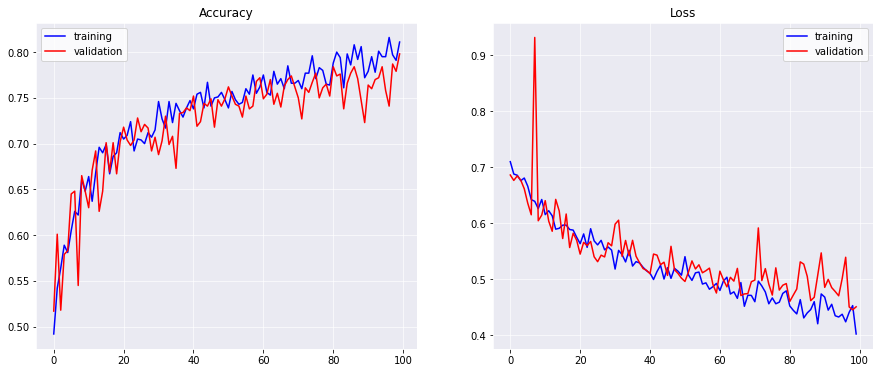

In [14]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=False)
ax[0].plot(epochs, acc,
          color='b',
          label='training')
ax[0].plot(epochs, val_acc,
          color='r',
          label='validation')
ax[0].set_title('Accuracy')
ax[0].grid(which='both', alpha=0.8, c='white')
ax[0].set_facecolor('#eaeaf2')
ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('white')
ax[0].spines['right'].set_color('white')
ax[0].spines['left'].set_color('white')
ax[0].legend()
ax[1].plot(epochs, loss,
          color='b',
          label='training')
ax[1].plot(epochs, val_loss,
          color='r',
          label='validation')
ax[1].set_title('Loss')
ax[1].grid(which='both', alpha=0.8, c='white')
ax[1].set_facecolor('#eaeaf2')
ax[1].spines['bottom'].set_color('white')
ax[1].spines['top'].set_color('white')
ax[1].spines['right'].set_color('white')
ax[1].spines['left'].set_color('white')
ax[1].legend()

plt.show()

#Dogs_and_cats_Detection Function Definition

In [15]:
def dogsorcatdetect(uploaded):
  for fn in uploaded.keys():
    path='/content/' + fn
    img=image.load_img(path, target_size=(150, 150))
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0:
      print(f"{fn} is a dog!")
    else:
      print(f"{fn} is a cat!")

In [22]:
from google.colab import files
k=0
while (k==0):
  uploadlocal=files.upload()
  dogsorcatdetect(uploadlocal)
  ext = str(input("Do you want to leave [Y/N]"))
  if(ext=='Y' or ext=='y'):
    k=1

#image choose from this source-> https://github.com/404S-retr0/RINEX_Project_Submission/blob/main/project/input2.jpg

Saving input2.jpg to input2 (1).jpg
[1.]
input2.jpg is a dog!
Do you want to leave [Y/N]y
